<a href="https://colab.research.google.com/github/Kotyga/MIPT-DLS-seminars/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Семинар 1

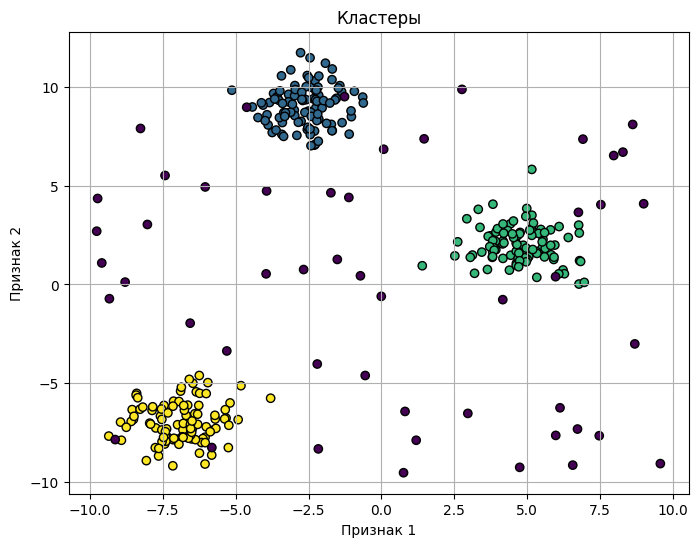

In [1]:
# @title Генерация данных
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Устанавливаем параметры для генерации кластеров
n_samples = 300  # Общее количество образцов
n_clusters = 3   # Количество кластеров
random_state = 42  # Для воспроизводимости

# Генерируем кластеры
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=random_state)

# Добавляем шумовые точки
n_noise = 50  # Количество шумовых точек
noise = np.random.uniform(low=-10, high=10, size=(n_noise, X.shape[1]))  # Генерируем случайные точки в диапазоне [-10, 10]

# Объединяем кластеры и шумовые точки
X_full = np.vstack((X, noise))
y_full = np.hstack((y, [-1] * n_noise))

# Визуализируем результаты
plt.figure(figsize=(8, 6))
plt.scatter(X_full[:, 0], X_full[:, 1], c=y_full, cmap='viridis', marker='o', edgecolor='k')
plt.title('Кластеры')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.grid()
plt.show()

## Алгоритмы кластеризации

### DBSCAN

Плотностной алгоритм кластеризации. Разделяет области с высокой плотностью точек и низкой плотностью точек.

Требует задания двух параметров : ε-окрестности, k-минимальное количество точек в кластере, в качестве меры расстояния, как правило Евклидова метрика.

**Основные термины:**

*Основная точка* — точка имеющая ≥ k соседей в ε окрестности.
*Граничная точка* — не основная точка, имеющая  хотя бы одну основную точку в ε окрестности.
*Шумовая точка* — ни основная, ни граничная.

**Алгоритм:**

Вход: обучающая выборка, параметры ε, k

1. Определить основные, граничные и шумовые   точки для параметров ε, k

2. Создать граф, в котором основные точки соединены, если они находятся на расстоянии <= ε

3. Найти связанные компоненты графа

4. Присвоить все граничные точки  к ближайшим связанным компонентам.


**Преимущества:**

* Сбособен обнаруживать выбросы
* Сложность выполнения: O(NlogN)
* Кластера произвольной формы
* Не требует количество кластеров

**Недостатки:**

* Граничные точки, могут принадлежать нескольким кластерам
* Плохо работает с данными с большой разницей в плотности, поскольку не удается выбрать приемлемую для всех кластеров комбинацию параметров.
* Выбор ε окрестности затруднителен (можно применять подходы схожие с подбором K в K-means)

![DBSCAN.png](https://github.com/max-chernyshov/Image/blob/master/Dbscan.png?raw=true)

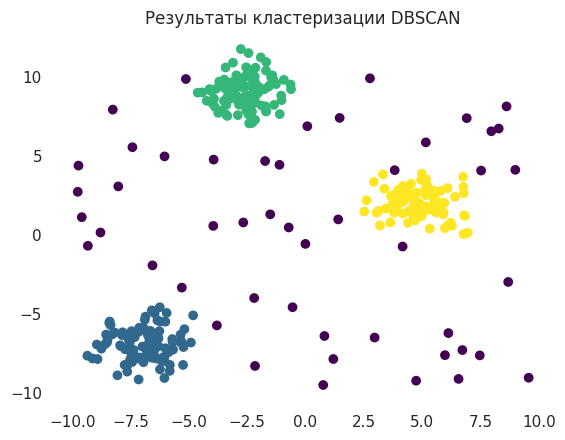

In [63]:
# @title Пример
# Применение алгоритма DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1,min_samples=5)
dbscan.fit(X_full)

# Получение меток кластеров
labels = dbscan.labels_

# Визуализация результатов кластеризации
plt.scatter(X_full[:, 0], X_full[:, 1], c=labels, cmap='viridis')
plt.title('Результаты кластеризации DBSCAN')
plt.show()

### K-means

Наиболее популярный алгоритм кластеризации.

Основная цель - минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров.

Требуемый параметр: количество кластеров K, в качестве меры расстояния-Евклидова метрика.

Как правило, для поиска оптимального количества кластеров применяют "метод локтя". При этом в качестве цели, может выступать максимизация дисперсии, минимизация искажения (внутрикластерного расстояния), минимизация коэффициента силуэта.

**Алгоритм**

Вход: матрица объектов с n признаками,количество кластеров K. Желательно выбирать центроиды, как наиболее удаленные друг от друга точки.

Повторять:

1. Отнести каждый объект к ближайшему центру
2. Вычислить новое положение центров (центр масс кластера).

Пока:
объекты не перестанут изменяться между кластерами.


**Преимущества:**

* Сравнительно высокая эффективность при простоте реализации
* Высокое качество кластеризации
* Возможность распараллеливания
* Существование множества модификаций

**Недостатки:**

* Количество кластеров является параметром алгоритма
* Инициализация центров кластеров в значительной степени влияет на результат кластеризации.
* Чувствительность к выбросам и шумам
* Возможность сходимости к локальному оптимуму
* Итеративный подход не дает гарантии сходимости к оптимальному решению.
* Алгоритм неприменим к данным, для которых не определено понятие "среднего", например, категориальным данным.

![k_means_clusteringJPG](https://github.com/max-chernyshov/Image/blob/master/k_means_clustering.JPG?raw=true)

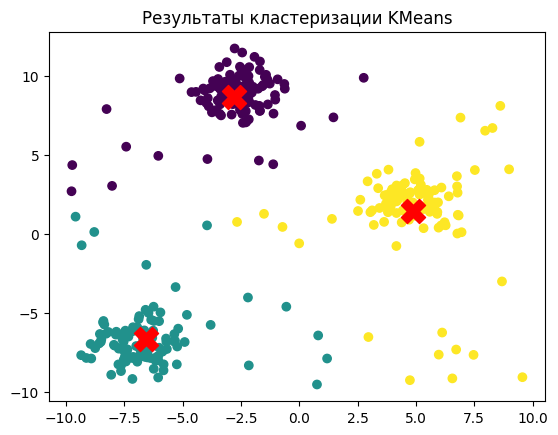

In [3]:
# @title Пример
# Применение алгоритма KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_full)

# Получение меток кластеров
labels = kmeans.labels_

# Визуализация результатов кластеризации
plt.scatter(X_full[:, 0], X_full[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title('Результаты кластеризации KMeans')
plt.show()

### Иерархическая кластеризация

Совокупность алгоритмов упорядочивания данных, направленных на создание иерархии (дерева) вложенных кластеров.

**Алгоритм**

Вход:  матрица расстояний M ∈ R^N×N между единичными  кластерами {x1}, . . {xN }.

Повторять:
1. Выбрать ближайшую пару кластеров i и j
2. Объеденить кластера i и j
3. Удалить из матрицы M строки/столбцы с индексами i , j
и  добавить новую строку для созданного кластера

Пока не останется один кластер.

**Преимущества:**

* Интерпретируемость

**Недостатки:**

* Вычислительная сложность

![Hierarchy.JPG](https://github.com/max-chernyshov/Image/blob/master/Hierarchy.JPG?raw=true)

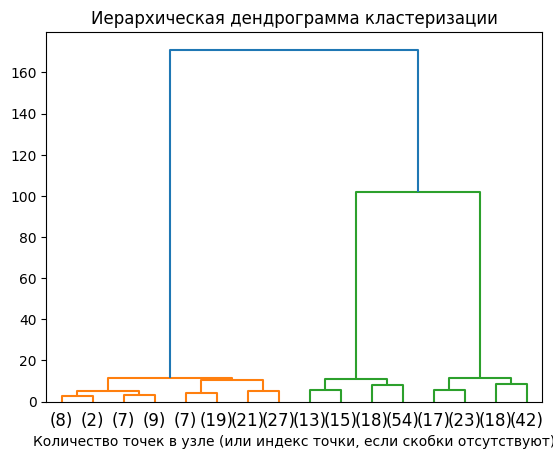

In [4]:
# @title Пример
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Создайте матрицу связей и затем постройте дендрограмму
    # подсчитайте количество выборок под каждым узлом
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # узел
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Отрисовка
    dendrogram(linkage_matrix, **kwargs)

ac = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

ac = ac.fit(X)
plt.title("Иерархическая дендрограмма кластеризации")
# отрисовка 3 уровней
plot_dendrogram(ac, truncate_mode="level", p=3)
plt.xlabel("Количество точек в узле (или индекс точки, если скобки отсутствуют)")
plt.show()

### Смесь Гауссиан

Модель, основанная на предположении, что данные генерируются из смеси нескольких нормальных распределений. Каждый кластер представляется как многомерное нормальное распределение с определёнными параметрами.

Требует задания двух параметров: количество компонентов (кластеров) и параметры каждого компонента (среднее и ковариационная матрица). В качестве меры расстояния обычно используется вероятностная мера.

**Основные термины**:

* **Компонент** — нормальное распределение, представляющее отдельный кластер в смеси.
* **Параметры компонента** — среднее значение и ковариационная матрица, описывающие положение и форму кластера.
* **Вероятностная принадлежность** — вероятность того, что точка принадлежит определенному кластеру.

**Алгоритм**:

**Вход:** обучающая выборка, количество компонентов

1. Инициализировать параметры для каждого компонента (средние значения и ковариационные матрицы).
2. Применить алгоритм Expectation-Maximization (EM):
   - **E-шаг:** Рассчитать вероятностную принадлежность каждой точки к каждому компоненту.
   - **M-шаг:** Обновить параметры компонентов на основе текущих вероятностей принадлежности.
3. Повторять E- и M-шаги до сходимости параметров или достижения максимального числа итераций.

**Преимущества:**

* Способен моделировать сложные распределения данных.
* Позволяет получать мягкие метки кластеров (вероятности принадлежности).
* Может работать с данными произвольной формы.
* Возможность использовать различные формы ковариационных матриц для моделирования кластера.

**Недостатки:**

* Требует задания количества кластеров заранее.
* Чувствителен к начальным условиям; может застревать в локальных минимумах.
* Плохо работает с данными с большой разницей в плотности, если кластеры имеют сильно разные размеры или формы.
* Необходимость в большом объёме данных для надежной оценки параметров.


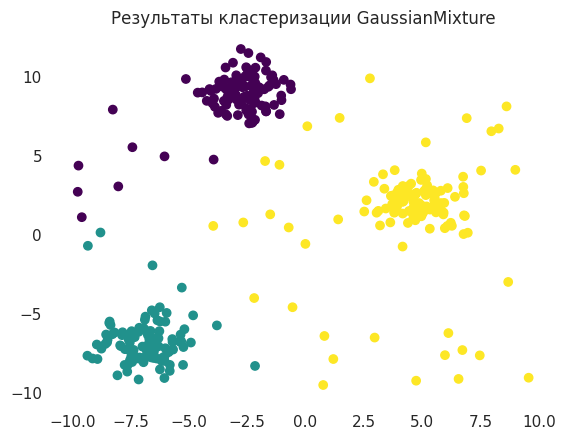

In [64]:
# @title Пример
# Применение алгоритма GaussianMixture
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X_full)

# Получение меток кластеров
labels = gm.predict(X_full)

# Визуализация результатов кластеризации
plt.scatter(X_full[:, 0], X_full[:, 1], c=labels, cmap='viridis')
plt.title('Результаты кластеризации GaussianMixture')
plt.show()

## Метрики

In [65]:
from sklearn.metrics import silhouette_score

# Вычисление коэффициента силуэта
silhouette_avg = silhouette_score(X_full, labels)
print(f'Средний коэффициент силуэта: {silhouette_avg:.2f}')

Средний коэффициент силуэта: 0.71


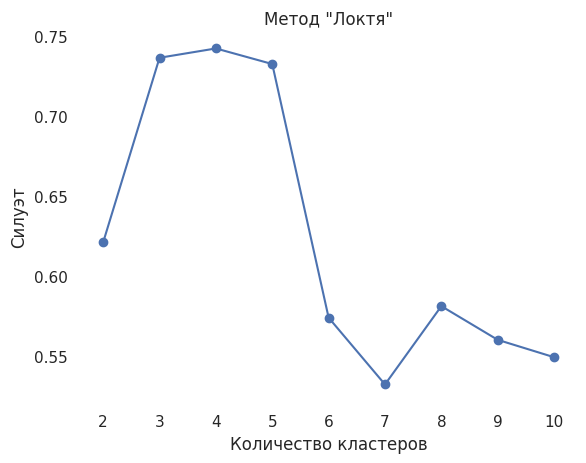

In [68]:
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_full)
    labels = kmeans.labels_
    sse.append(silhouette_score(X_full, labels))

plt.plot(range(2, 11), sse, marker='o')
plt.title('Метод "Локтя"')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэт')
plt.show()

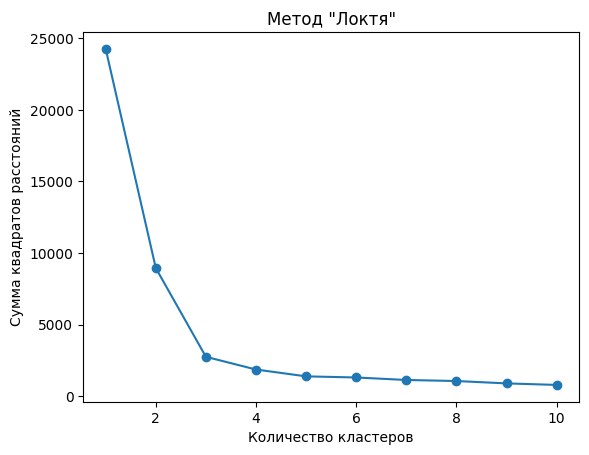

In [7]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_full)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title('Метод "Локтя"')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()

## Разбор задачи с кагла

In [69]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
! pip install kaggle
! kaggle datasets download -d imakash3011/customer-personality-analysis
! unzip customer-personality-analysis

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
customer-personality-analysis.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  customer-personality-analysis.zip
replace marketing_campaign.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


### Данные

#### Контекст

**Постановка задачи**

Анализ социального портрета клиента - это детальный анализ идеальных потребителей, это помогает бизнесу лучше понимать своих клиентов и облегчает им продажу продуктов в соответствии с конкретными потребностями, поведением разных категорий людей.


#### Содержание

**Атрибуты**

**Люди**

* ID: уникальный идентификатор клиента
* Year_Birth: год рождения клиента
* Education: уровень образования клиента
* Marital_Status: семейное положение клиента
* Income: годовой доход семьи клиента
* Kidhome: количество детей в семье клиента
* Teenhome: количество подростков в семье клиента
* Dt_Customer: дата регистрации клиента в компании
* Recency: количество дней с момента последней покупки клиента
* Complain: 1, если клиент жаловался в течение последних 2 лет, 0 в противном случае

**Продукты**

* MntWines: сумма, потраченная на вино за последние 2 года
* MntFruits: сумма, потраченная на фрукты за последние 2 года
* MntMeatProducts: сумма, потраченная на мясо за последние 2 года
* MntFishProducts: сумма, потраченная на рыбу за последние 2 года
* MntSweetProducts: сумма, потраченная на сладости за последние 2 года
* MntGoldProds: сумма, потраченная на золото за последние 2 года

**Продвижение по службе**

* NumDealsPurchases: количество покупок, совершенных со скидкой
* AcceptedCmp1: 1, если клиент принял предложение в рамках 1-й кампании, 0 в противном случае
* AcceptedCmp2: 1, если клиент принял предложение во 2-й кампании, 0 в противном случае
* AcceptedCmp3: 1, если клиент принял предложение в рамках 3-й кампании, 0 в противном случае
* AcceptedCmp4: 1, если клиент принял предложение в рамках 4-й кампании, 0 в противном случае
* AcceptedCmp5: 1, если клиент принял предложение в рамках 5-й кампании, 0 в противном случае
* Response: 1, если клиент принял предложение в ходе последней кампании, 0 в противном случае

**Место**

* NumWebPurchases: количество покупок, совершенных через веб-сайт компании
* NumCatalogPurchases: количество покупок, совершенных с использованием каталога
* NumStorePurchases: количество покупок, совершенных непосредственно в магазинах
* NumWebVisitsMonth: количество посещений веб-сайта компании за последний месяц

#### Цель

Необходимо выполнить кластеризацию для обобщения клиентских сегментов.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [70]:
main_df = pd.read_csv("marketing_campaign.csv", sep="\t")
df = main_df.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [11]:
df.shape

(2240, 29)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [13]:
df.nunique()

,0
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


In [14]:
df.isna().any()

,0
ID,False
Year_Birth,False
Education,False
Marital_Status,False
Income,True
Kidhome,False
Teenhome,False
Dt_Customer,False
Recency,False
MntWines,False


<Axes: >

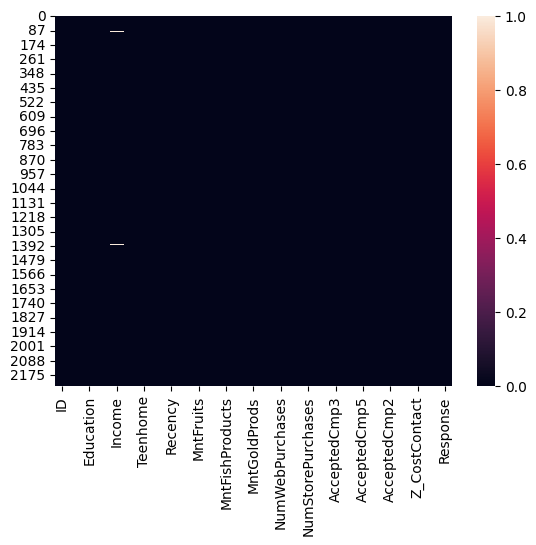

In [15]:
sns.heatmap(df.isnull())

In [16]:
# Удаление столбцов, поскольку они ничего не внесут вклад в построение модели
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [17]:
# Проверка корреляции

corr = df.select_dtypes(exclude=['object']).corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)[24:50:2]

MntMeatProducts      NumCatalogPurchases    0.723827
NumStorePurchases    MntWines               0.642100
NumCatalogPurchases  MntWines               0.635226
MntFruits            MntFishProducts        0.594804
Income               NumCatalogPurchases    0.589162
                     MntMeatProducts        0.584633
MntFishProducts      MntSweetProducts       0.579870
Income               MntWines               0.578650
MntFishProducts      MntMeatProducts        0.568402
MntSweetProducts     MntFruits              0.567164
MntMeatProducts      MntWines               0.562667
Income               NumWebVisitsMonth      0.553088
MntMeatProducts      MntFruits              0.543105
dtype: float64

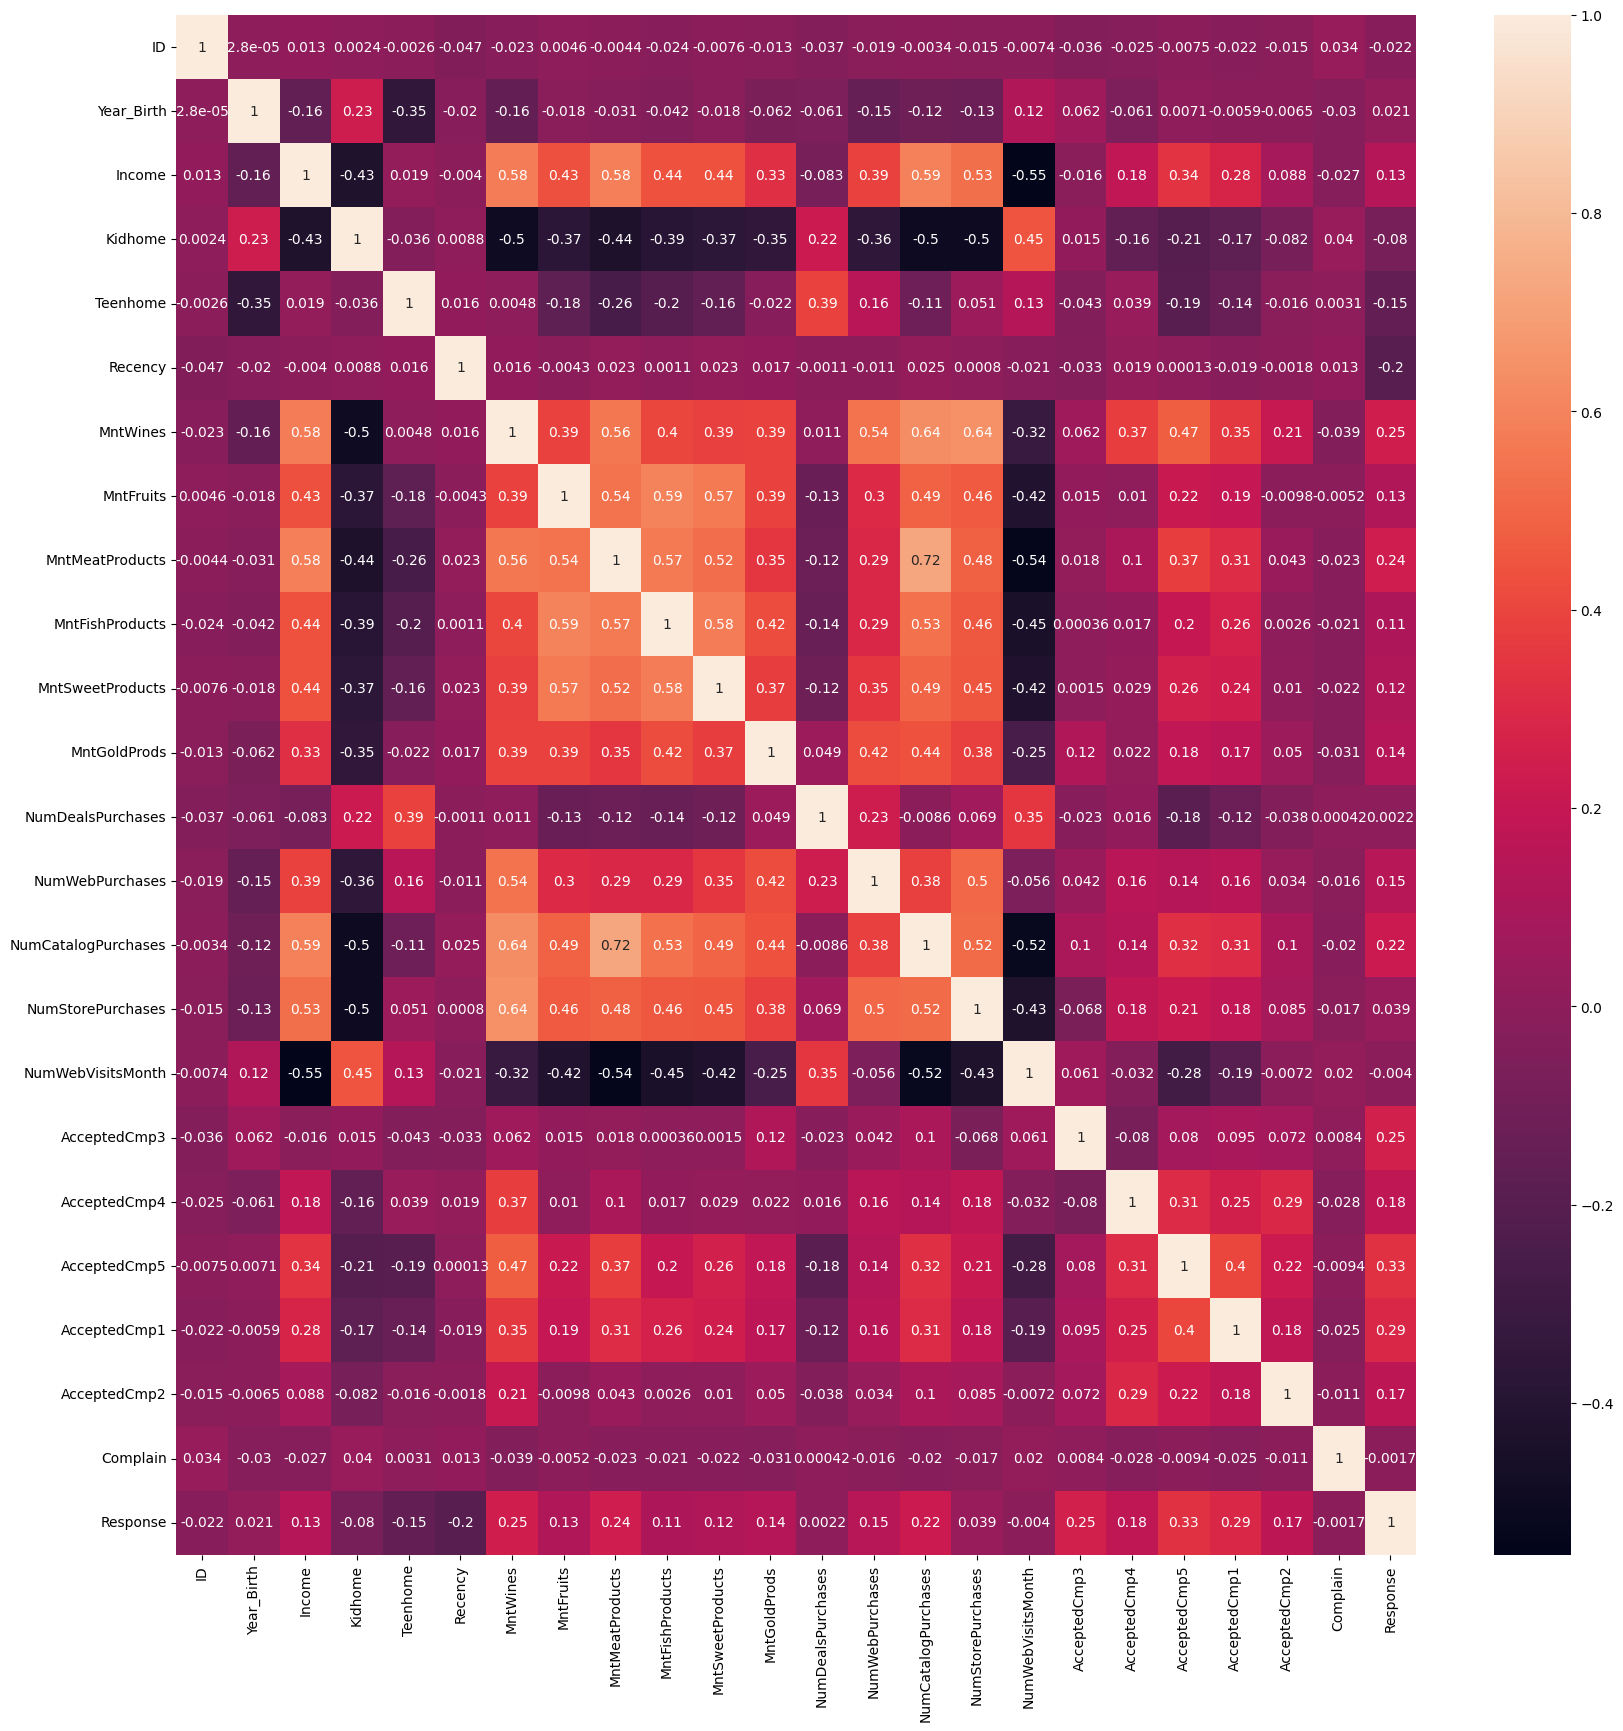

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

In [19]:
# Заполнение недостающего значения

df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any()

,0
ID,False
Year_Birth,False
Education,False
Marital_Status,False
Income,False
Kidhome,False
Teenhome,False
Dt_Customer,False
Recency,False
MntWines,False


In [20]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [21]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [22]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [23]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
relationship,1444
Single,796


In [24]:
# Объединение различных фреймворков данных в один столбец для уменьшения количества измерений

df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [25]:
# Удаление столбцов для уменьшения размерности и сложности модели

col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,Graduation,Single,58138.0,04-09-2012,58,0,0,1617,1,25
1,2174,1954,Graduation,Single,46344.0,08-03-2014,38,0,2,27,0,6
2,4141,1965,Graduation,relationship,71613.0,21-08-2013,26,0,0,776,0,21
3,6182,1984,Graduation,relationship,26646.0,10-02-2014,26,0,1,53,0,8
4,5324,1981,PhD,relationship,58293.0,19-01-2014,94,0,1,422,0,19


### Проклятье размерности или почему надо сокращать количество признаков


Проклятие размерности — термин, используемый в отношении ряда свойств многомерных пространств и комбинаторных задач. В первую очередь это касается экспоненциального роста необходимых экспериментальных данных в зависимости от размерности пространства при решении задач вероятностно-статистического распознавания образов, машинного обучения, классификации и т.д. Также это касается экспоненциального роста числа вариантов в комбинаторных задачах в зависимости от размера исходных данных, что приводит к соответствующему росту сложности переборных алгоритмов. «Проклятие» действует и на непрерывные оптимизационные методы в силу усложнения многомерной целевой функции.

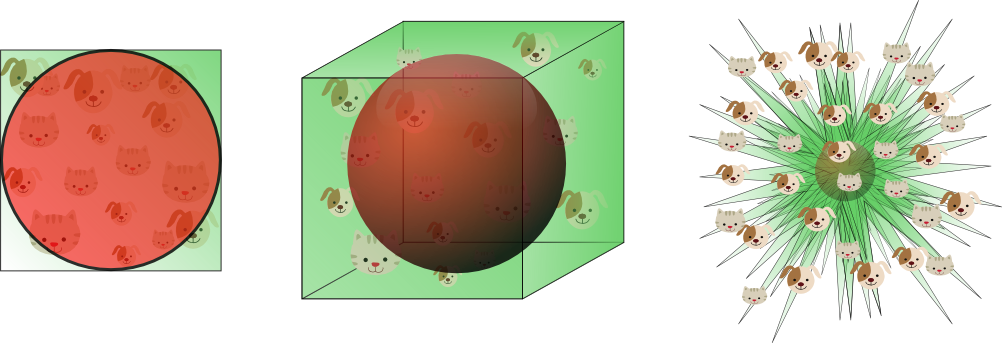

In [26]:
df['Age'] = 2015 - df["Year_Birth"]

In [27]:
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')
df['Education'] = df['Education'].replace(['Basic'], 'UG')

In [28]:
# Количество дней, в течение которых клиент был связан с компанией

# Изменение Dt_customer в формат временной метки
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, format="%d-%m-%Y")
df['first_day'] = '01-01-2015'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

In [29]:
df=df.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
df.shape

(2240, 9)

In [30]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color="Education")
fig.show()

In [31]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color="Marital_Status")
fig.show()

In [32]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Marital_Status")
fig.show ()

In [33]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Education")
fig.show ()

In [34]:
fig = px.histogram (df, x = "NumTotalPurchases",  facet_row = "Education")
fig.show ()

In [35]:
fig = px.histogram (df, x = "Age",  facet_row = "Marital_Status")
fig.show ()

In [36]:
fig = px.histogram (df, x = "Income",  facet_row = "Marital_Status")
fig.show ()

In [37]:
fig =  px.pie (df, names = "Marital_Status", hole = 0.4, template = "gridon")
fig.show ()

In [38]:
fig =  px.pie (df, names = "Education", hole = 0.4, template = "gridon")
fig.show ()

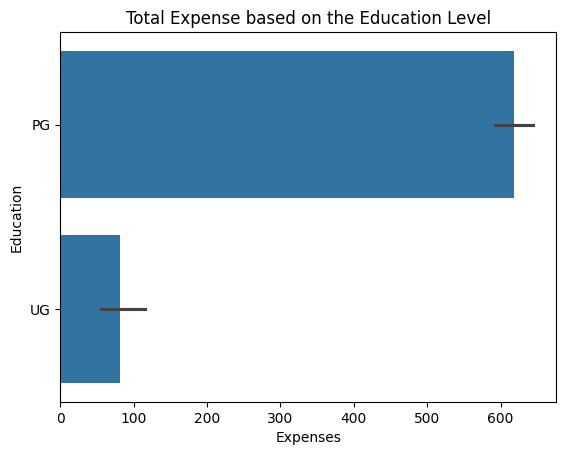

In [39]:
sns.barplot(x = df['Expenses'],y = df['Education']);
plt.title('Total Expense based on the Education Level');

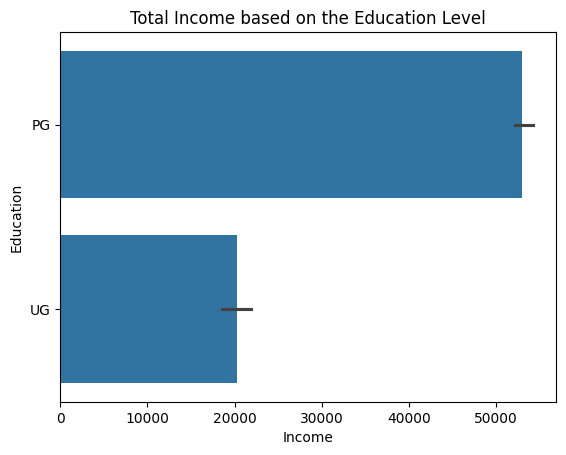

In [40]:
sns.barplot(x = df['Income'],y = df['Education']);
plt.title('Total Income based on the Education Level');

In [41]:
df.describe()

,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.950446,605.798214,0.446875,14.862054,46.194196,539.582143
std,25037.797168,0.751803,602.249288,0.890543,7.677173,11.984069,202.122512
min,1730.000000,0.000000,5.000000,0.000000,0.000000,19.000000,186.000000
25%,35538.750000,0.000000,68.750000,0.000000,8.000000,38.000000,366.750000
50%,51741.500000,1.000000,396.000000,0.000000,15.000000,45.000000,541.500000
75%,68289.750000,1.000000,1045.500000,1.000000,21.000000,56.000000,715.000000
max,666666.000000,3.000000,2525.000000,5.000000,44.000000,122.000000,885.000000


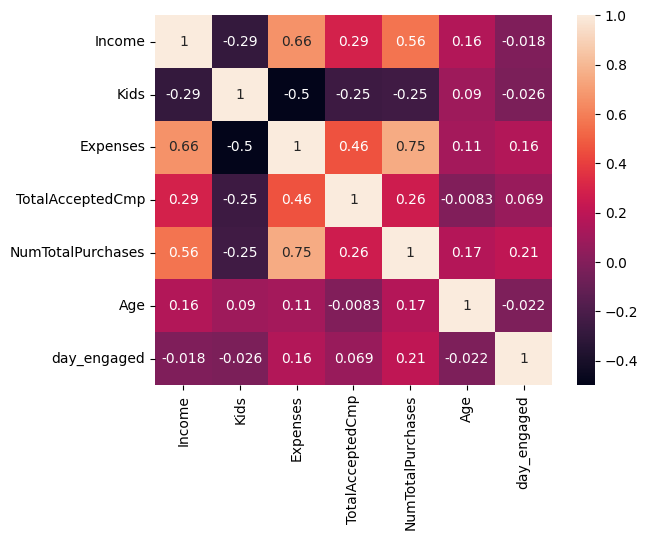

In [42]:
sns.heatmap(df.select_dtypes(exclude=['object']).corr(), annot=True);

In [43]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(cate)

['Education', 'Marital_Status']


In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [45]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
relationship,1444
Single,796


In [46]:
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [47]:
df1 = df.copy()

In [48]:
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)

StandardScaler - стандартизация данных.

$$Z = \frac{x-\overline{x}}{\sigma}$$

In [49]:
scaled_features_df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,-0.157171,-1.346874,0.235327,-1.264505,1.679417,0.621248,1.320826,0.985345,1.531185
1,-0.157171,-1.346874,-0.235826,1.396361,-0.961275,-0.501912,-1.154596,1.235733,-1.190545
2,-0.157171,0.742460,0.773633,-1.264505,0.282673,-0.501912,0.799685,0.317643,-0.205773
3,-0.157171,0.742460,-1.022732,0.065928,-0.918094,-0.501912,-0.894025,-1.268149,-1.061881
4,-0.157171,0.742460,0.241519,0.065928,-0.305254,-0.501912,0.539114,-1.017761,-0.953012


Метод k-средних (англ. k-means) — наиболее популярный метод кластеризации.

Действие алгоритма таково, что он стремится минимизировать суммарное квадратичное отклонение точек кластеров от центров этих кластеров:
$$\sum_{i=1}^{k}\sum_{x\in S_{i}}^{}(x-\mu_{i})^{2}$$

где

 $$k\text{ — число кластеров,}$$

 $$S_{i}\text{ — полученные кластеры, }$$

$$i=1,2,\dots ,k$$

 $$\mu _{i}\text{ — центры масс* всех векторов x из кластера }S_{i}$$

*Центр масс - среднее арифметическое векторов признаков всех вошедших в этот кластер объектов

Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике.

Алгоритм завершается, когда на какой-то итерации не происходит изменения внутрикластерного расстояния. Это происходит за конечное число итераций, так как количество возможных разбиений конечного множества конечно, а на каждом шаге суммарное квадратичное отклонение V уменьшается, поэтому зацикливание невозможно.

**Проблемы k-means**

* Не гарантируется достижение глобального минимума суммарного квадратичного отклонения V, а только одного из локальных минимумов.
* Результат зависит от выбора исходных центров кластеров, их оптимальный выбор неизвестен.
* Число кластеров надо знать заранее

**silhouette coefficient**

 Изначально коэффициент определяется для каждого объекта выборки, а метрика для результатов кластеризации всей выборки вводится как средний коэффициент силуэта для всех объектов выборки.

$$\text{Чтобы ввести коэффициент силуэта } S(x_{i})$$

$$\text{, нам потребуются две вспомогательные величины. Первая, } A(x_{i})$$

$$\text{, — это среднее расстояние между и объектами того же кластера. Вторая, }
B(x_{i})$$

$$\text{, — это среднее расстояние между и объектами следующего ближайшего кластера. Коэффициент силуэта вводится следующим образом:} $$

$$S(x_{i})=\frac{B(x_{i})-A(x_{i})}{max(B(x_{i}),A(x_{i}))}$$


Коэффициент принимает значения от –1 до +1 и максимизируется, когда кластеры кучные и хорошо отделены друг от друга.


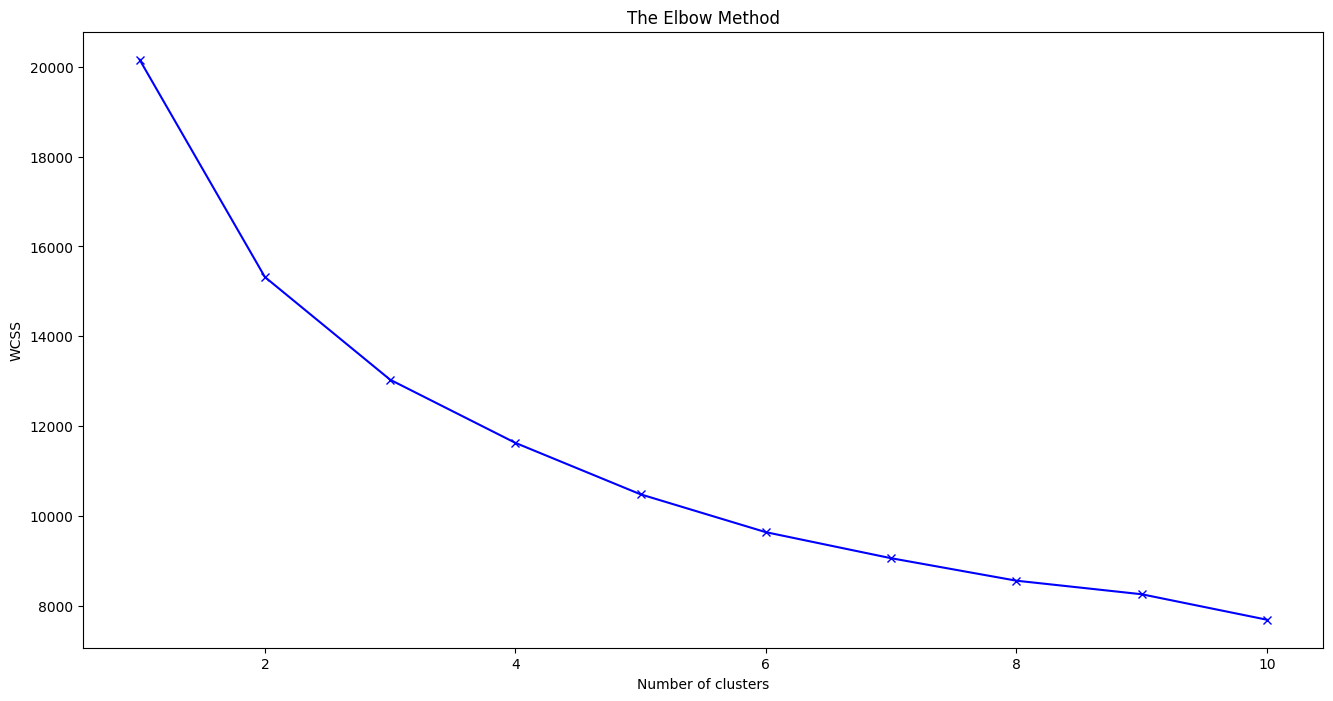

In [50]:
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(scaled_features_df)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

iteria_ - Сумма квадратов расстояний выборок до их ближайшего центра кластера, взвешенная по весам выборок, если они указаны.

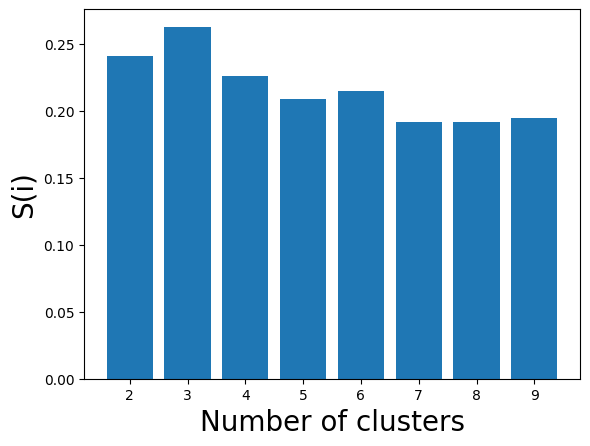

In [51]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_features_df)
    silhouette_scores.append(silhouette_score(scaled_features_df, m1.fit_predict(scaled_features_df)))
plt.bar(range(2,10), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [52]:
silhouette_scores

[0.24115026328011627,
 0.26266881837803874,
 0.22614017820607632,
 0.20870037108992534,
 0.21442120455505384,
 0.19125651424804474,
 0.1916706249176463,
 0.19423540800990663]

In [53]:
# Получаем максимальное значение оценки силуэта и добавляем 2 в индекс, потому что индекс начинается с 2.

sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


In [54]:
# Обучение прогнозированию с использованием алгоритма K-средних.

kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(scaled_features_df)
pred=kmeans.predict(scaled_features_df)


# Добавление этих значений кластера в основной фрейм данных (без стандартизации)

df['cluster'] = pred + 1

In [55]:
df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged,cluster
0,0,0,58138.0,0,1617,1,25,58,849,2
1,0,0,46344.0,2,27,0,6,61,299,1
2,0,1,71613.0,0,776,0,21,50,498,2
3,0,1,26646.0,1,53,0,8,31,325,1
4,0,1,58293.0,1,422,0,19,34,347,1


In [56]:
scaled_features_df.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,-0.157171,-1.346874,0.235327,-1.264505,1.679417,0.621248,1.320826,0.985345,1.531185
1,-0.157171,-1.346874,-0.235826,1.396361,-0.961275,-0.501912,-1.154596,1.235733,-1.190545
2,-0.157171,0.742460,0.773633,-1.264505,0.282673,-0.501912,0.799685,0.317643,-0.205773
3,-0.157171,0.742460,-1.022732,0.065928,-0.918094,-0.501912,-0.894025,-1.268149,-1.061881
4,-0.157171,0.742460,0.241519,0.065928,-0.305254,-0.501912,0.539114,-1.017761,-0.953012


In [57]:
df['Education'].value_counts()

,count
Education,
0,2186
1,54


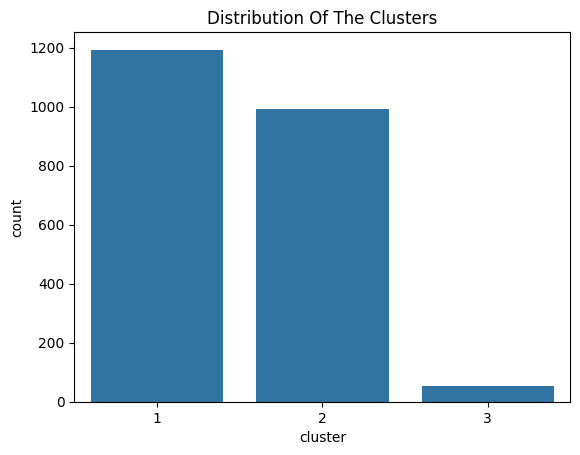

In [58]:
pl = sns.countplot(x=df["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [59]:
df.nunique()

,0
Education,2
Marital_Status,2
Income,1975
Kids,4
Expenses,1054
TotalAcceptedCmp,6
NumTotalPurchases,39
Age,59
day_engaged,663
cluster,3


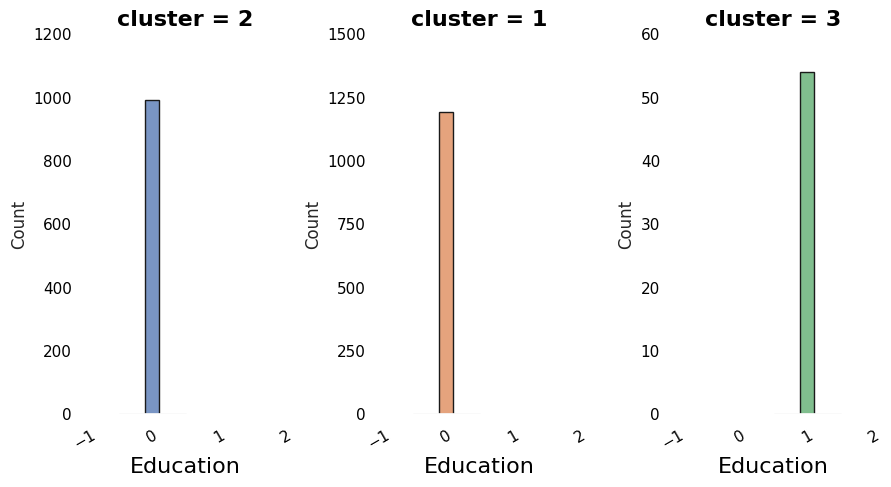

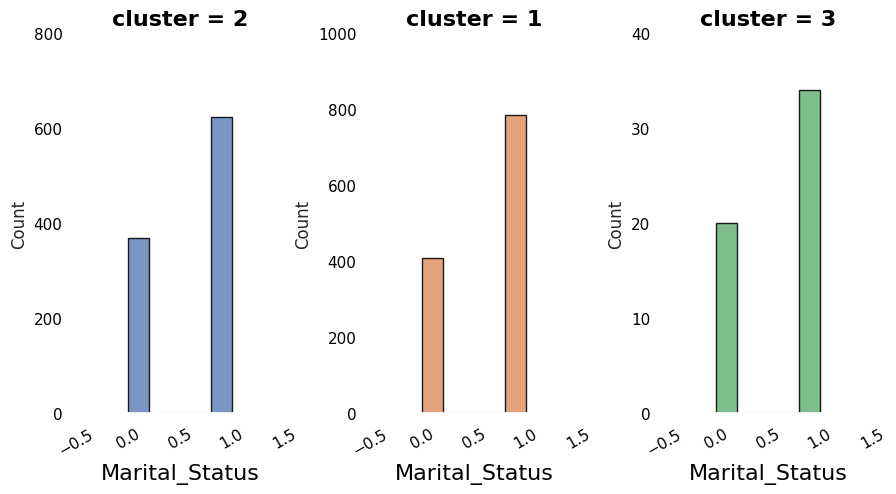

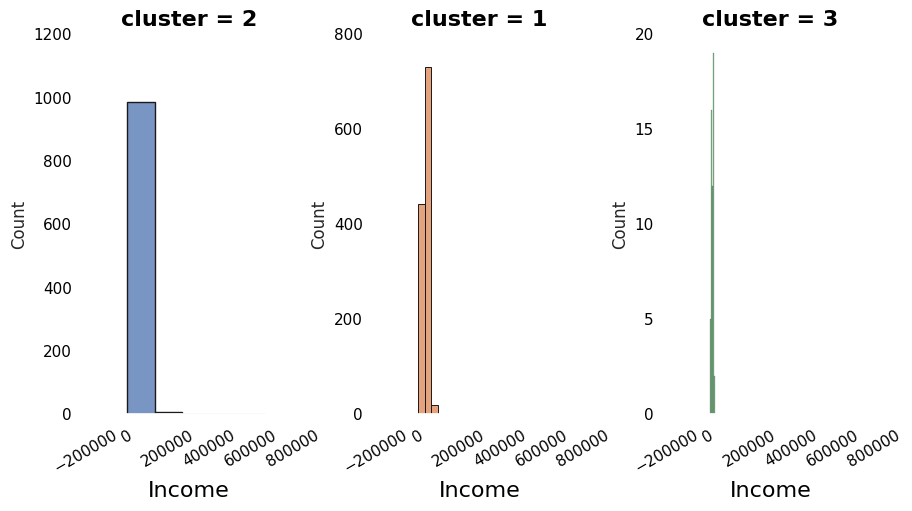

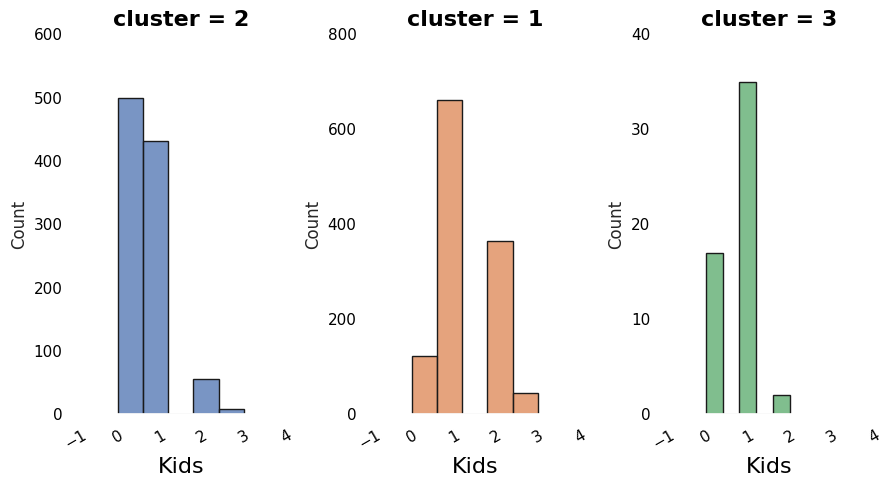

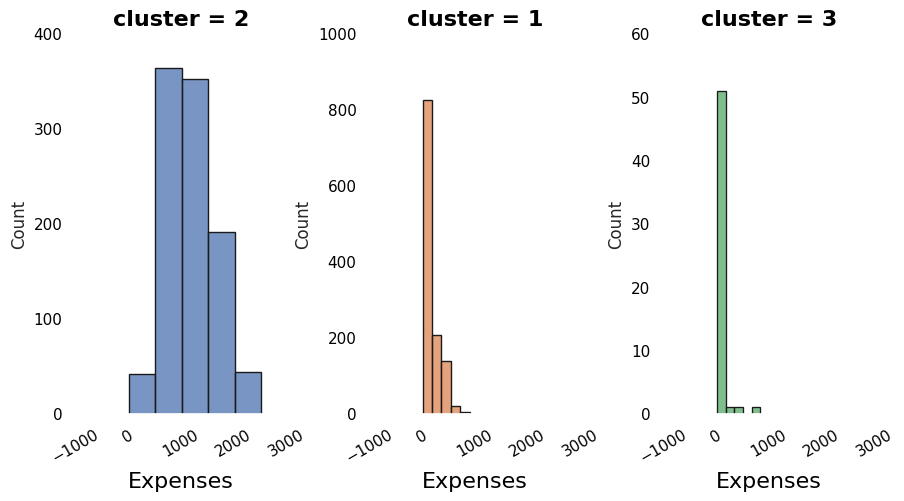

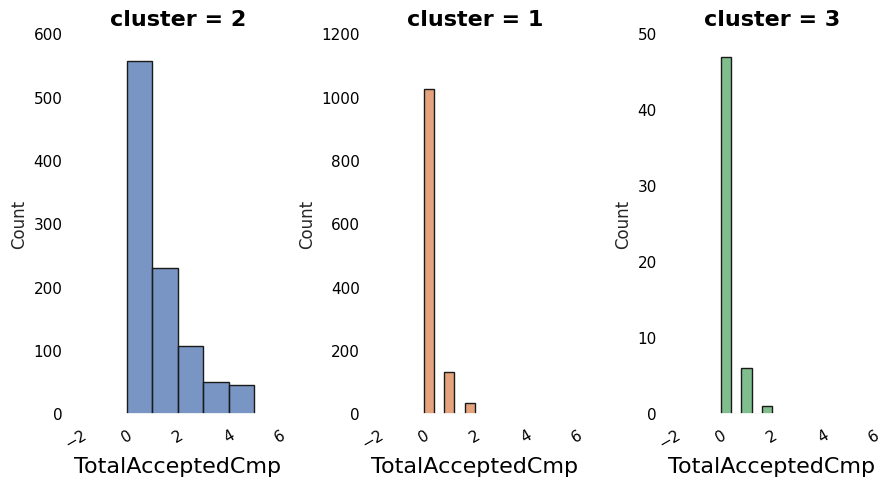

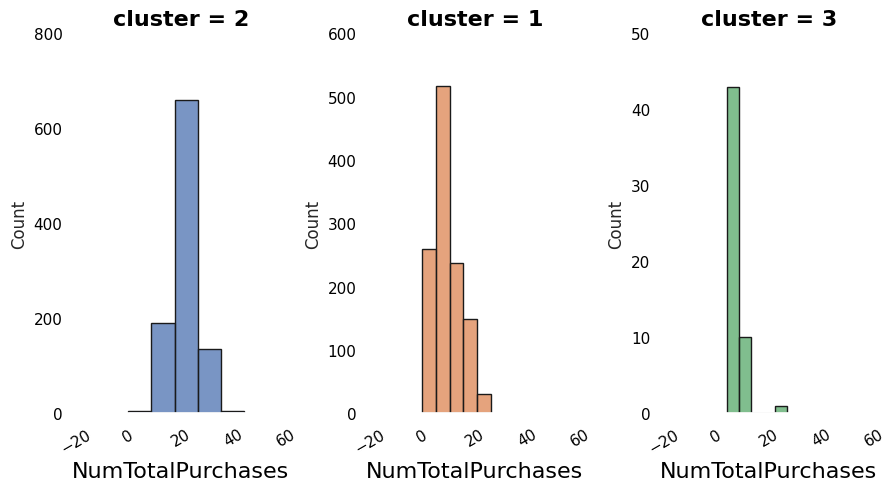

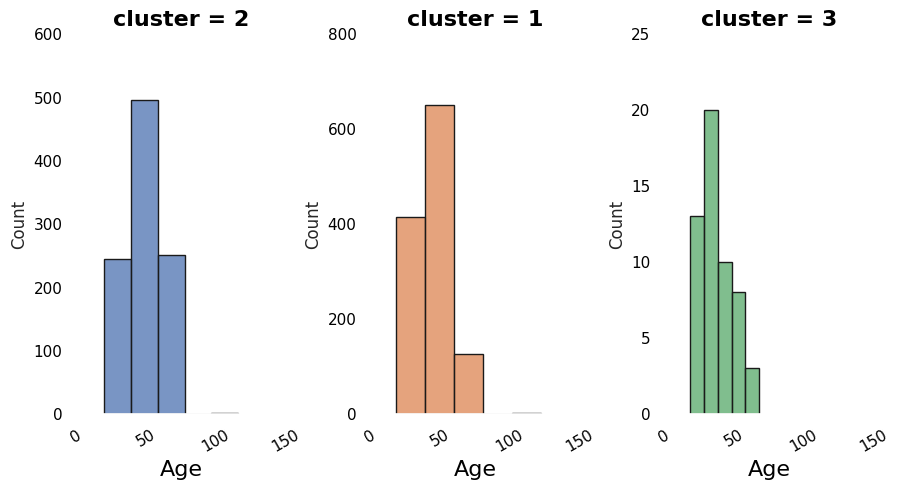

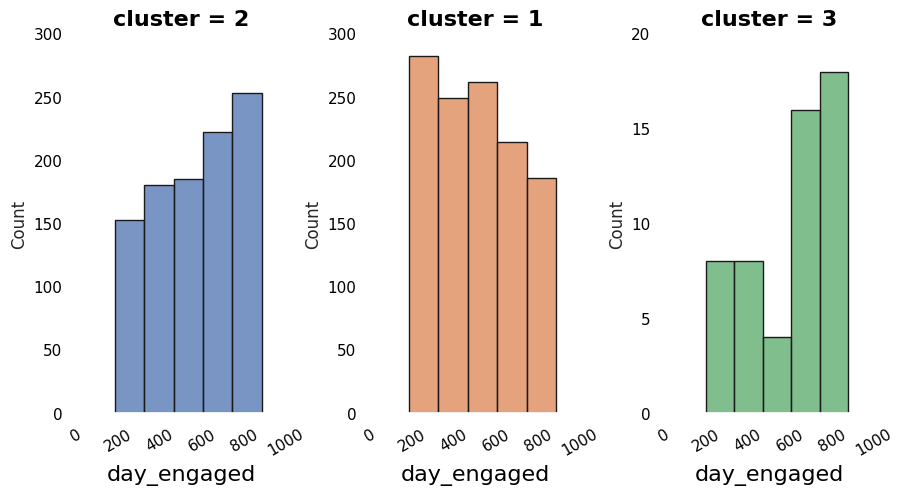

In [60]:
df['cluster'] = df['cluster'].astype(str)

sns.set(rc={'axes.facecolor': 'white', 'figure.facecolor': 'white', 'axes.grid': False})

for column in df.columns:
    if column != "cluster":
        diag = sns.FacetGrid(df, col="cluster", hue="cluster", sharey=False)
        diag.map_dataframe(sns.histplot, column, bins=5, ec="k")
        diag.set_xticklabels(rotation=30, color='black')
        diag.set_yticklabels(color='black')
        diag.set_xlabels(size=16, color='black')
        diag.set_titles(size=16, color='black', fontweight="bold")
        diag.fig.set_figheight(6)
        plt.show()

#### Основываясь на приведенной выше информации, мы можем разделить клиента на 3 части:


1. **Высокоактивный клиент** : - Эти клиенты принадлежат к первому кластеру.
2. **Умеренно активный клиент** : - Эти клиенты принадлежат ко второму кластеру.
3. **Наименее активный клиент** : - Эти клиенты принадлежат к третьему кластеру.

#### Характеристики высокоактивного клиента

- **С точки зрения образования**
 - Очень активные клиенты из PG background


- **В терминах Marital_status**
 - Количество людей, состоящих в отношениях, составляет ок. два раза одиноких людей


- **С точки зрения дохода**
 - Доход высокоактивного клиента немного меньше по сравнению с умеренно активным клиентом.


- **С точки зрения детей**
 - У высокоактивного клиента больше детей по сравнению с другими клиентами ( в среднем на 1 ребенка ).


- **С точки зрения расходов**
 - Расходы высокоактивного клиента меньше по сравнению со средними.
 - Эти клиенты потратили в среднем. примерно в 100-200 денежных единиц.


- **С точки зрения возраста**
 - Возраст этих клиентов составляет от 25 до 75 лет.
 - Максимальный возраст клиента - от 40 до 50 лет.


- **В терминах day_engaged**
 - Высокоактивные клиенты становятся более лояльными, поскольку они сотрудничают с компанией в течение более длительного периода времени.

#### Характеристики умеренно активного клиента

- **С точки зрения образования**
 - Умеренно активные клиенты также из PG backgroud


- **В терминах Marital_status**
 - Количество людей, состоящих в отношениях, немного больше по сравнению с одинокими людьми


- **С точки зрения дохода**
 - Доходы умеренно активного клиента выше по сравнению с другими клиентами.


- * С точки зрения детей**
 - У умеренно активного клиента меньше детей по сравнению с высокоактивным клиентом ( максимум у клиента нет детей ).


- **С точки зрения расходов**
 - Расходы умеренно активного клиента больше по сравнению с активным.
 - Эти клиенты потратили в среднем. примерно в 500-2000 денежных единиц.


- **С точки зрения возраста**
 - Возраст этих клиентов составляет от 25 до 75 лет.
 - Максимальный возраст клиента - от 35 до 60 лет.


- **В терминах day_engaged**
 - Умеренно активные клиенты немного менее вовлечены в работу компании по сравнению с высокоактивными клиентами.

#### Характеристики наименее активного клиента

- **С точки зрения образования**
 - Наименее активные пользователи из UG backgroud

    
- **В терминах Marital_status**
 - Количество людей, состоящих в отношениях, составляет ок. равны одиноким людям

- **С точки зрения дохода**
 - Доход наименее активного клиента очень мал или, скажем, незначителен.
    
- **С точки зрения детей**
 - Лишь у немногих из этих клиентов есть ребенок.

- **С точки зрения расходов**
 - Расходы наименее активного клиента очень малы или, скажем так, незначительны.


- **С точки зрения возраста**
 - Возраст этих клиентов составляет от 15 до 30 лет.


- **В терминах day_engaged**
 - Наименее активные клиенты редко регистрируются в компании на более длительный срок.

# Полезная литература

1. https://scikit-learn.org/stable/modules/clustering.html
2. https://education.yandex.ru/handbook/ml/article/klasterizaciya


P.S.

**Нормализация** — это изменение масштаба данных из исходного диапазона, чтобы все
значения находились в диапазоне от 0 до 1. Нормализация может быть полезной в
некоторых алгоритмах машинного обучения, когда данные временных рядов имеют
входные значения с различными масштабами. Это может потребоваться для алгоритмов, таких как k-Nearest соседей, которые используют вычисления
расстояний, линейную регрессию и искусственные нейронные сети.

Пример реализации нормализации данных:

```python
print((temperatures_numpy- np.min(temperatures_numpy)) /
(np.max(temperatures_numpy) - np.min(temperatures_numpy)))
```

**Стандартизация** набора данных включает изменение масштаба распределения
значений так, чтобы среднее значение наблюдаемых значений было 0, а стандартное
отклонение –1. Это можно рассматривать как вычитание среднего значения или
центрирование данных.

Как и нормализация, стандартизация может быть полезной в некоторых алгоритмах
машинного обучения, таких как машины опорных векторов, линейная и
логистическая регрессия. Стандартизация предполагает, что ваши наблюдения
соответствуют гауссовскому распределению со средним значением и стандартным
отклонением.

Пример реализации стандартизации данных:

```python
print((temperatures_numpy- np.min(temperatures_numpy)) /
(np.std(temperatures_numpy)))
```